# **ADD HERE THE NOTEBOOK NAME**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook

## Additional Comments


* In case you have any additional comments that don't fit in the previous bullets, please state them here.


---

# Install python packages in the notebooks

<span style="color:red;">IMPORTANT!!! Change "ml-template-forked" to the name that you have given your GitHub/GitPod Workspace.</span>

In [1]:
%pip install -r /workspace/manned-unmanned-airplane-classifer/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory.  

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/manned-unmanned-airplane-classifer/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/manned-unmanned-airplane-classifer'

---

In [ ]:
import joblib
import os

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.pipeline import make_pipeline

---

## Table of Content

- [Section 1](#section-1)
- [Section 2](#section-2)
- [Save files to workspace](#save-files-to-workspace)


---

# Biplanes vs Monoplanes from 1930s to early 1940s

Step 1 - Define our data set

In [13]:
data = {
    'Wingspan': [
        9.8, 10.0, 9.7, 11.4, 9.4, 7.9, 8.9, 9.5, 13.9, 9.8,  # Biplanes
        11.3, 9.0, 12.2, 9.8, 10.6, 11.0, 10.7, 11.0, 10.5, 10.0  # Monoplanes
    ],
    'MaxSpeed': [
        414, 430, 441, 295, 195, 183, 175, 370, 222, 210,  # Biplanes
        470, 525, 547, 470, 500, 460, 390, 510, 520, 592   # Monoplanes
    ],
    'Weight': [
        2300, 2200, 2300, 2800, 1700, 670, 830, 1650, 3500, 1220,  # Biplanes
        2200, 2000, 2950, 2400, 2450, 2350, 2000, 2600, 2800, 2700  # Monoplanes
    ],
    'Label': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # Biplanes
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1   # Monoplanes
    ]
}

data = {
    'Wingspan': [
        8.5, 7.2, 8.1, 9.0, 8.2, 8.6, 11.9, 8.1, 10.6, 14.3,  # WWI
        9.9, 11.2, 11.3, 10.5, 12.2, 9.2, 11.0, 12.0, 9.8, 13.5  # WWII
    ],
    'MaxSpeed': [
        185, 185, 210, 190, 177, 150, 198, 220, 165, 175,  # WWI
        640, 594, 700, 685, 547, 655, 600, 533, 648, 509   # WWII
    ],
    'Weight': [
        420, 410, 500, 470, 400, 520, 660, 640, 560, 920,  # WWI
        2800, 2950, 3400, 3200, 2950, 2700, 2800, 2400, 3100, 4100  # WWII
    ],
    'Label': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # WWI
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1   # WWII
    ]
}


data = {
    'Wingspan': [
        0.35, 0.34, 0.42, 0.4, 0.7, 12, 20, 39.9, 19, 15,  # Drones
        11, 10.7, 17.6, 35.8, 9.45, 68, 11.6, 11.7, 30.4, 14.8  # Manned
    ],
    'MaxSpeed': [
        60, 55, 70, 58, 94, 220, 480, 630, 1100, 350,  # Drones
        226, 230, 540, 850, 2400, 988, 285, 338, 956, 375  # Manned
    ],
    'Weight': [
        1.2, 0.3, 1.1, 0.9, 3.4, 650, 2220, 14600, 20400, 5000,  # Drones
        1111, 1157, 5670, 41413, 12000, 183500, 1150, 1542, 45000, 4900  # Manned
    ],
    'Label': [0]*10 + [1]*10  # 0 = Drone, 1 = Manned
}


Step 1b - Turn dataset into a dataframe (df is a DataFrame, which is a data structure from the Pandas library)

In [14]:
df = pd.DataFrame(data)
X = df[['Wingspan', 'MaxSpeed', 'Weight']]
y = df['Label']

witout looping over many hyperparameter values

In [ ]:
# Define the cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models with standard scaling
models = {
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42)),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42)),
    'Neural Net': make_pipeline(StandardScaler(), MLPClassifier(max_iter=1000, random_state=42))
}

# Evaluate each model with cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


iterate but withot Leave one out

In [ ]:
# Your data (assumed defined)
# X, y = ...

# Cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameters to test
k_values = [1, 3, 5, 7, 9]

# Store mean accuracy scores
for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"KNN (k={k}) Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


looping but including leave one out

In [ ]:
# Hyperparameter values to test
k_values = [1, 3, 5, 7]

# Leave-One-Out setup
loo = LeaveOneOut()

# Store average accuracy for each k
k_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = []

    for train_index, val_index in loo.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        scores.append(acc)

    mean_acc = np.mean(scores)
    k_scores.append((k, mean_acc))

# See which k performed best
for k, score in k_scores:
    print(f"k={k}, LOO accuracy={score:.4f}")

In [ ]:
# Define cross-validation strategies
kf = KFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()

# Hyperparameters to test
k_values = [1, 3, 5, 7]

print("=== 5-Fold Cross-Validation ===")
for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"KNN (k={k}) Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

print("\n=== Leave-One-Out Cross-Validation ===")
for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    print(f"KNN (k={k}) Accuracy: {scores.mean():.4f}")

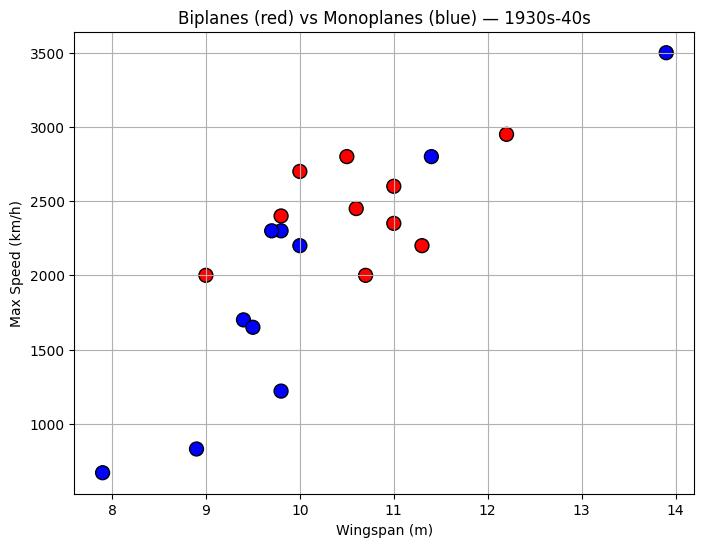

In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Wingspan'], df['Weight'], c=df['Label'], cmap='bwr', edgecolor='k', s=100)
plt.xlabel("Wingspan (m)")
plt.ylabel("Weight (km/h)")
plt.title("Biplanes (red) vs Monoplanes (blue) — 1930s-40s")
plt.grid(True)
plt.show()

Train: 60–80%
Validation: 10–20% (optional if using CV)
Test: 10–20%

🧠 Standard Splits (if you're not using CV):
Set	Typical %
Train	70–80%
Validation	10–15%
Test	10–15%

Your model — including the choice of hyperparameters — has indirectly seen the test data

It no longer reflects how well the model would do on truly unseen data

Since the data set is so small (and we therefore need all the data we can get) lets do a cross validation to reduce variance.
For the sake that we are using Old School ML algorithms like knn, decition trea and ... lets do CV
 
KNN
👉 Because KNN is very sensitive to the choice of k and to the data distribution — so CV helps get a stable, reliable evaluation.

Decision Trees
👉 High variance models. One split can overfit or underfit. Cross-validation balances that.

Support Vector Machines (SVM)
👉 To tune hyperparameters like C and gamma.

Logistic Regression / Linear Models
👉 Especially when data is limited, to tune regularization.

In [17]:
# Step 3: Preprocess (standardize features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [19]:
# Step 5: Train models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'Neural Net': MLPClassifier(hidden_layer_sizes=(3,), activation='relu', max_iter=1000)
}

In [20]:
# Step 6: Fit and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

KNN Accuracy: 0.50
Random Forest Accuracy: 1.00
SVM Accuracy: 0.67
Neural Net Accuracy: 0.83


/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


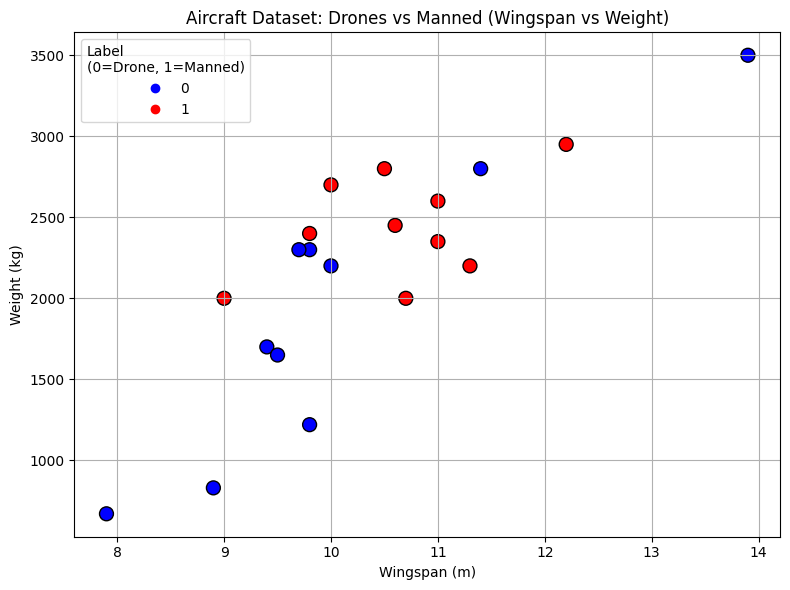

In [21]:
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Wingspan'], df['Weight'], c=df['Label'], cmap='bwr', edgecolor='k', s=100)
plt.xlabel("Wingspan (m)")
plt.ylabel("Weight (kg)")
plt.title("Aircraft Dataset: Drones vs Manned (Wingspan vs Weight)")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Label\n(0=Drone, 1=Manned)")
plt.tight_layout()
plt.show()

---

# Section 2


Section 2 content

---

# Save files to workspace

We will generate the following files
* Train set
* Test set
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* etc.

In [ ]:
topic = 'topic'  # datasets
notebook = 'notebook'  # collections
version = 'v1'
file_path = f'outputs/{notebook}/{notebook}/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/TelcoCustomerChurn.csv",index=False)

## Train Set

Note that ...

In [ ]:
print(X_train.shape)
X_train.head()

X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [ ]:
y_train

In [ ]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)